
<div>
<img src="Images/LOGO.png" width="300" align="right">
</div>

# Learning Healthcare Systems

Estaimted time needed: **6** hours

## Objectives

After completing this course you will be able to:

-   Acquire data in various ways
-   Obtain insights from Data with Pandas library



<h1 id="data_acquisition">Data Acquisition</h1>
<p>
In this section, you will learn how to load a dataset into a Jupyter Notebook and create a cohort for the futher analysis.<br>
As an example, we will use the Type-2 Diabetes (T2D) dataset. It includes data extracted from the Indiana Network for Patient Care for patients presenting with Diabetes.<br>
    <br>
    The dataset consists of 5 tables in CSV (comma separated value) format:
    
-   Patients table 
-   Prescription medication table 
-   Encounters table 
-   Diagnoses table 
-   Clinical variables (e.g. tests, measurements etc.) table 
    
Deatailed dataset description: <a href="https://github.com/regenstrief/T15Training/blob/master/Dictionaries/Data%20Dictionary%20-%20T2D.md" target="_blank">https://github.com/regenstrief/T15Training/blob/master/Dictionaries/Data%20Dictionary%20-%20T2D.md</a></li>

The Pandas Library is a useful tool for data manipulation and analysis. 
</p>


In [1]:
from collections import Counter

import pandas as pd 
import ipywidgets as widgets
import qgrid
import sweetviz as sv
from ipywidgets import interact, interact_manual, HBox, Label
#for qgrid desnt work
#jupyter nbextension enable --py --sys-prefix qgrid
#jupyter nbextension enable --py --sys-prefix widgetsnbextension
import functions_for_LHS_workshops as f_LHS

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read csv files. In the brackets, we put the file name and path, so that Pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.<br>

You can also assign the dataset to any variable you create.
</p>

In [2]:
patients_df = pd.read_csv('patients.csv', sep=',')
diagnosis_df = pd.read_csv('diagnosis.csv', sep=',')
encounters_df = pd.read_csv('encounters.csv', sep=',')
medication_df = pd.read_csv('medication.csv', sep=',')

<h1 id="basic_insight">Basic Insights of the Dataset</h1>
<p>
Next step after reading data into a Pandas dataframe, is data exploration.<br>
There are several ways to obtain essential insights of the data to help us better understand our dataset.
</p>


<h2>Analysis of tables content</h2>
<p>
Choose a table below to see its view.<br>
    Grid allows to <b>filter</b> and <b>sort</b> data by any column. <br>
    You will be able <b>to get detailed description</b> of each colomn by pointing your mouse on a column name.
</p>

In [3]:
items = ['patients', 'medication','diagnosis', 'encounters']
w = widgets.Dropdown(options=items, description='Select a table to view:', disabled=False,style={'description_width': 'max-content'},)
interact(f_LHS.dataframe_2_qgrid, x=w)

interactive(children=(Dropdown(description='Select a table to view:', options=('patients', 'medication', 'diag…

<function functions_for_LHS_workshops.dataframe_2_qgrid(x)>

In [4]:
# I don't know should any activity be included into Jupyter, but here is my offer of how to organise it.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1>Activity 1: </h1>
<b>Check data types of 'diagnosis_df' dataframe.</b>
</div>

In [5]:
#student's solution

Double-click <b>here</b> to see the solution.

<!-- The answer is below:

diagnosis_df.dtypes

-->

<h2>Exploratory Data Analysis of the tables</h2>

To get a statistical summary of each column, such as, count, column mean value or column standard deviation use 'describe' method:
<p>
This method shows statistical summaries of all numeric-typed (int, float) columns.<br>
For example, the attribute <b>"INDEX_YEAR"</b> (Year of Diabetes Diagnosis) has 77,908 <b>counts</b>, the <b>mean</b> value of this column is 2008, the <b>median value</b> is 2009, the <b>standard deviation</b> is 3.96, the minimum value is 1995, 25th percentile is 2006, 75th percentile is 2012, and the <b>maximum value</b> is 2015.
<br>

In [6]:
interact(f_LHS.df_2_visualized_EDA, x=w)

interactive(children=(Dropdown(description='Select a table to view:', options=('patients', 'medication', 'diag…

<function functions_for_LHS_workshops.df_2_visualized_EDA(x)>

<h2>Creation of a cohort </h2>
<p>
The main goal of this section is to create a cohort for identification of outpatient clinic patients who are at higher risk of hospitalisation or ED visit. The following steps should be taken to build the dataset:
    
<ol>
    <li>Analysis of tables that will be used as data sources for creation of the cohort (Figure 1.A.)</li>
    <li>Creation of a table with inpatients who were hospitalised with diabeties. This table is based on 'Encounters' (identifies the fact of admission) and 'Diagnosis' (identifies the reason of admission) tables (Figure 1.B.)</li>
    <li>Joining 'Patients' table with the table obtained on step 2. (Figure 1.C.)</li>
    <li>Joining 'Medication' table with the table obtained on step 3. (Figure 1.C.)</li>
</ol>
    </p>

<div>
<img src="Images/data_linkage.png" width="1000" >
</div>

In [7]:
cohort=f_LHS.cohort_creation()

Obtained dataset has 77908 rows and 15 columns.


<h2>View of the dataset</h2>
<p>
To have a look at the final cohort use the grid below. <br>
This grid allows to <b>filter</b> and <b>sort</b> data by any column. <br>
You will be able <b>to get detailed description</b> of each colomn by pointing your mouse on a column name.
</p>

In [8]:
f_LHS.cohort_2_qgrid(x=cohort)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<h2>Save the dataset</h2>
<p>
Correspondingly, Pandas library allows to save the dataset to '.csv' file by using <code>dataframe.to_csv()</code> method. It is possible to add the file path and name along with quotation marks in the brackets.
</p>
<p>
    For example, to save the dataframe <b>cohort</b> as <b>cohort_t2d.csv</b> to the local machine, use the syntax below:
</p>


In [9]:
cohort.to_csv("cohort_t2d.csv", index=False)

<h1>Exploratory Data Analysis of the cohort</h1>

                                             |                                             | [  0%]   00:00 ->…


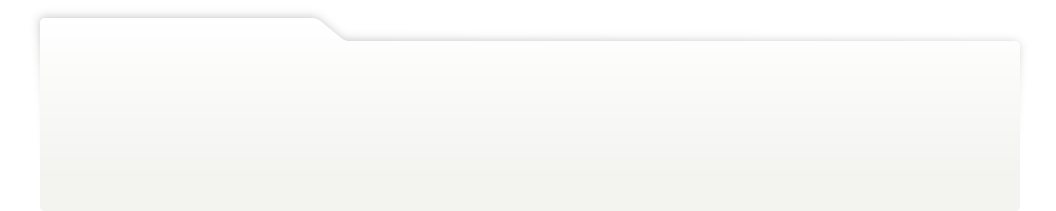
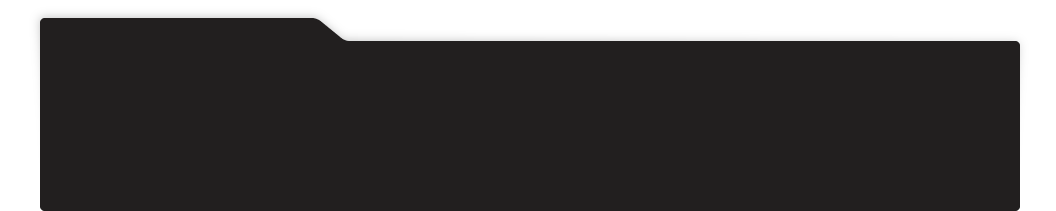
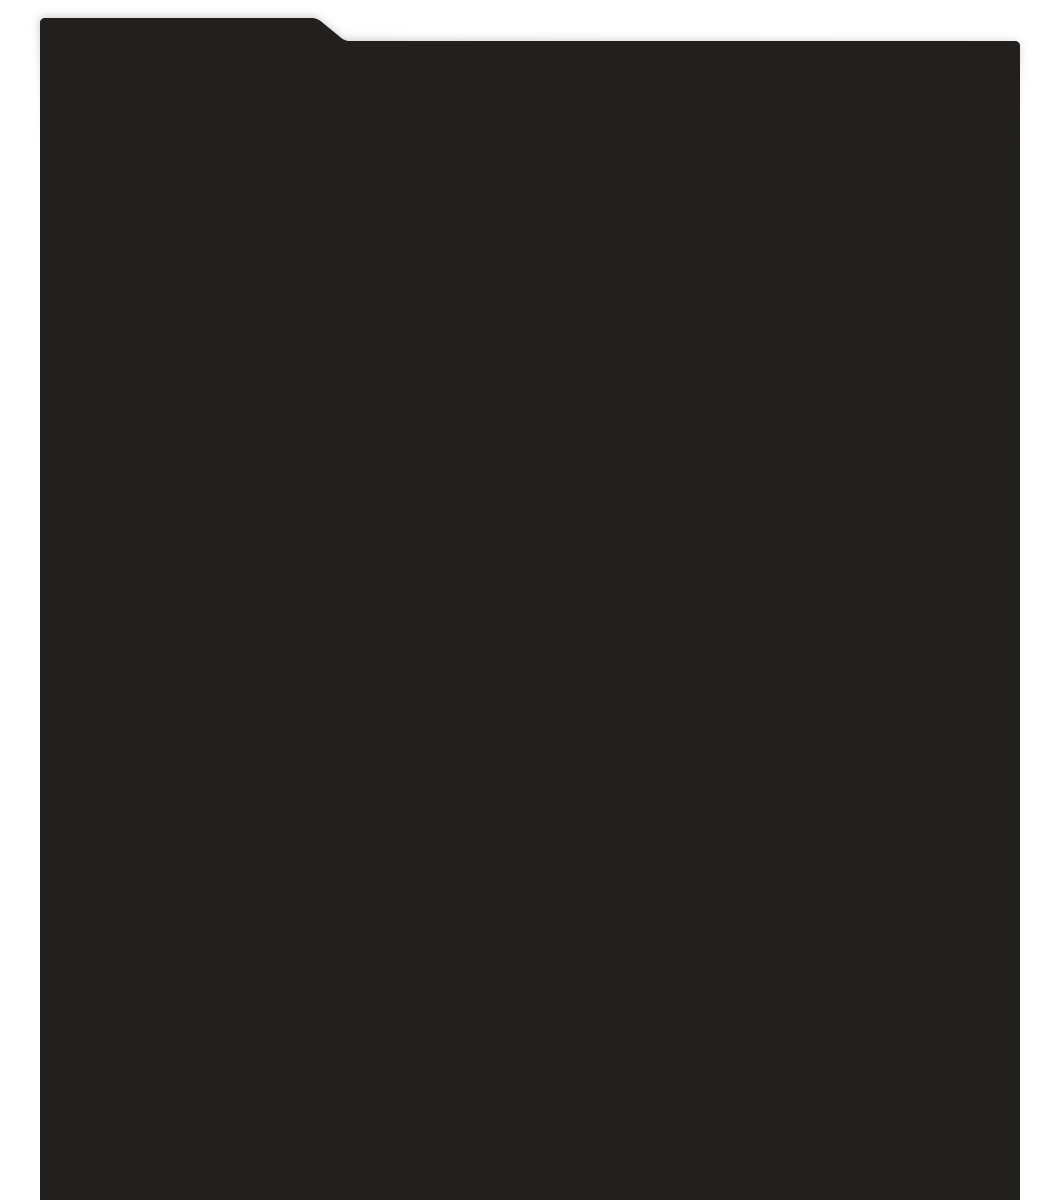
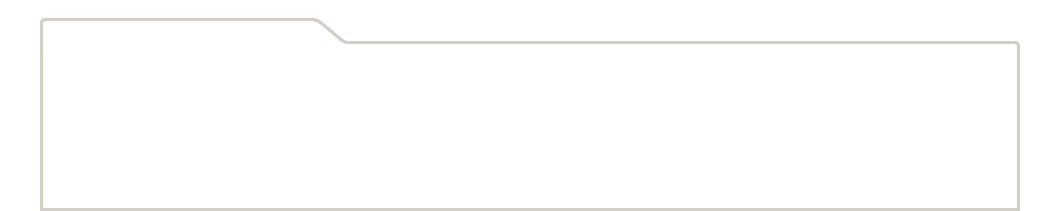
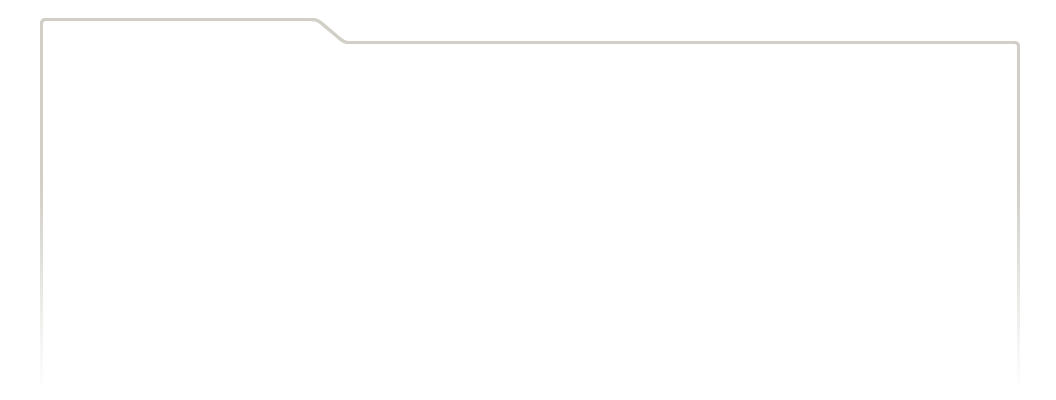
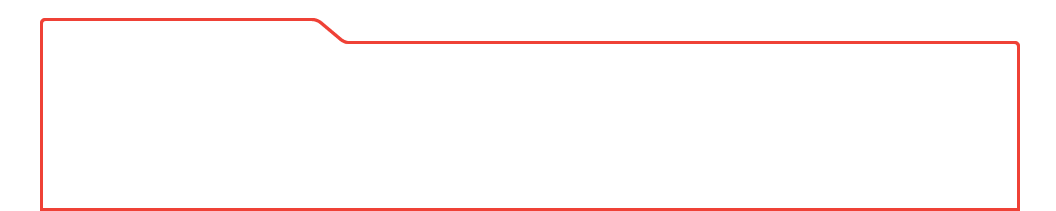
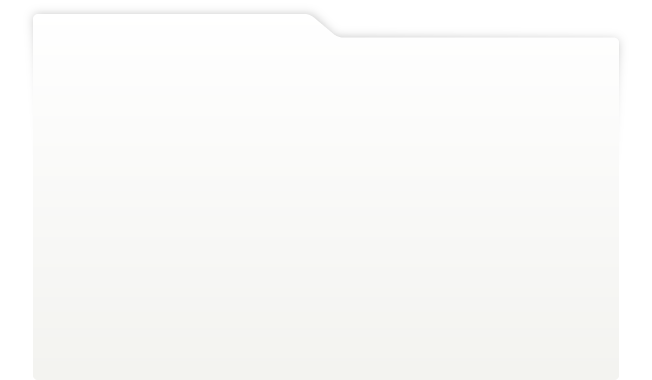
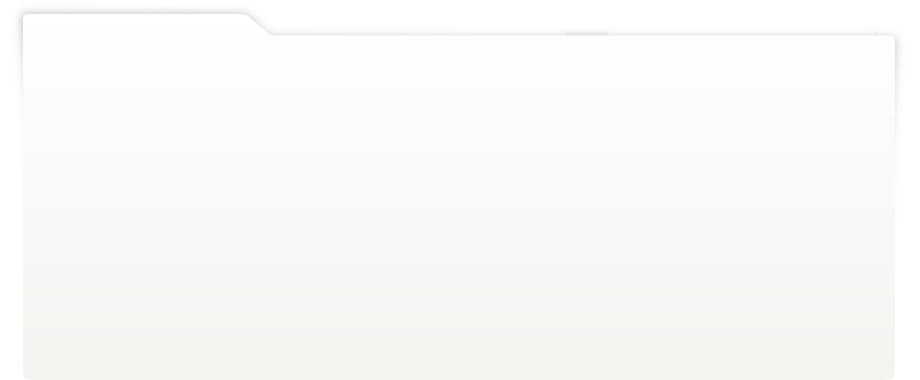
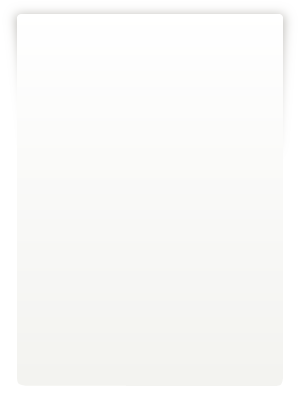
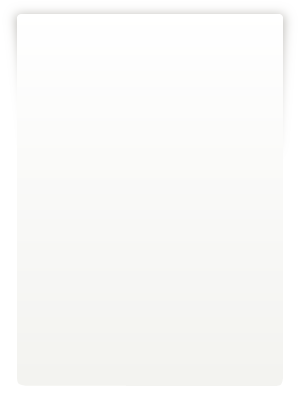
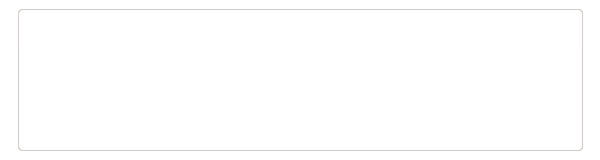
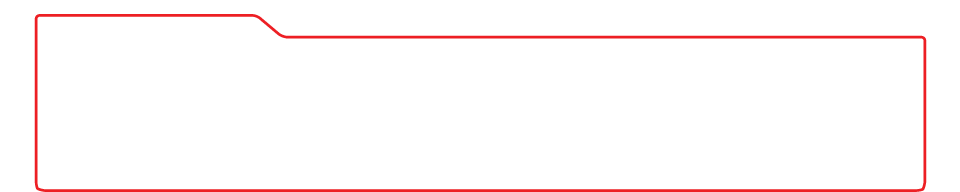
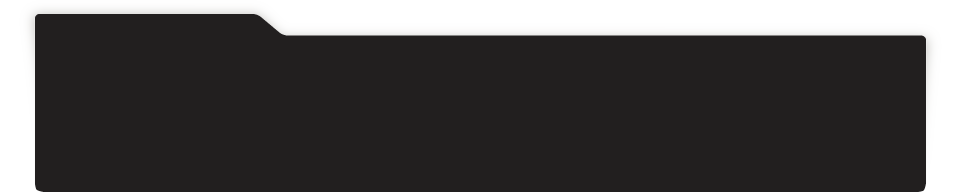
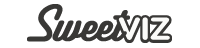
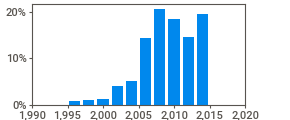
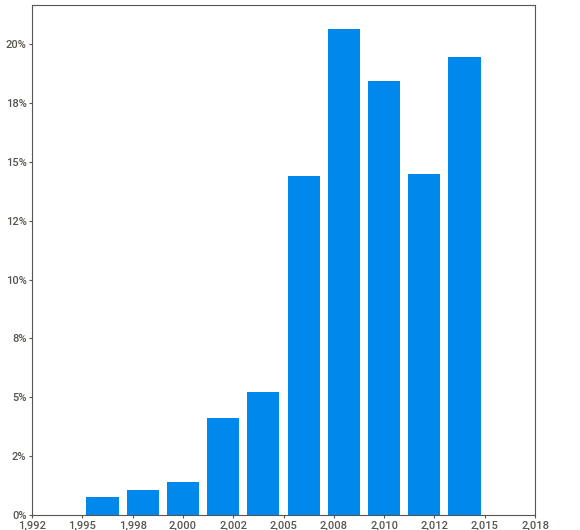
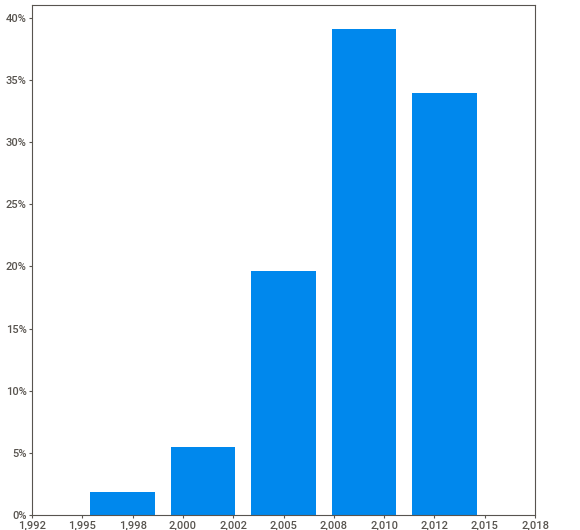
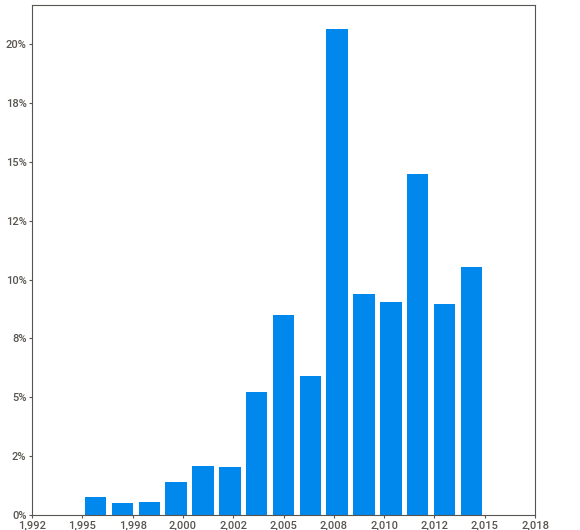
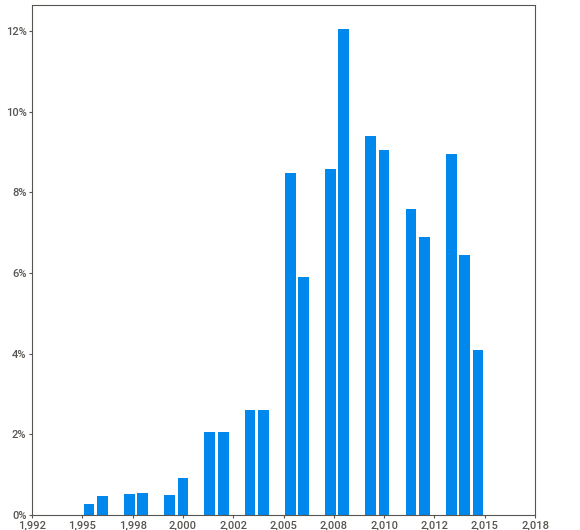
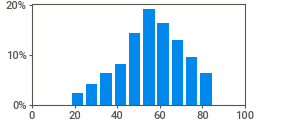
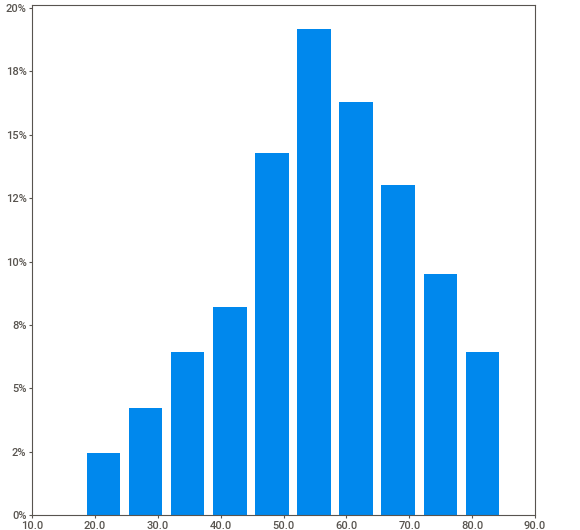
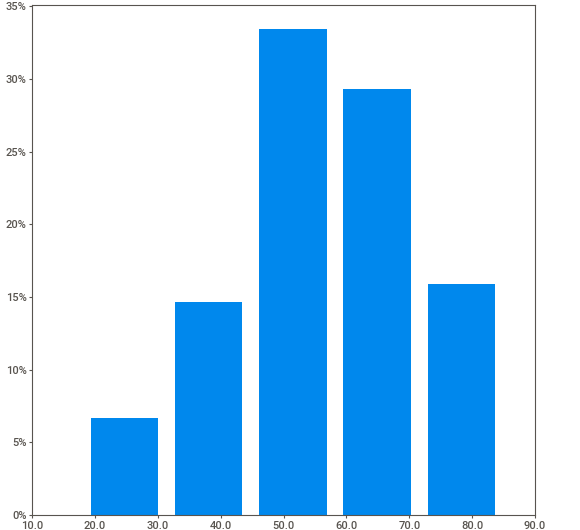
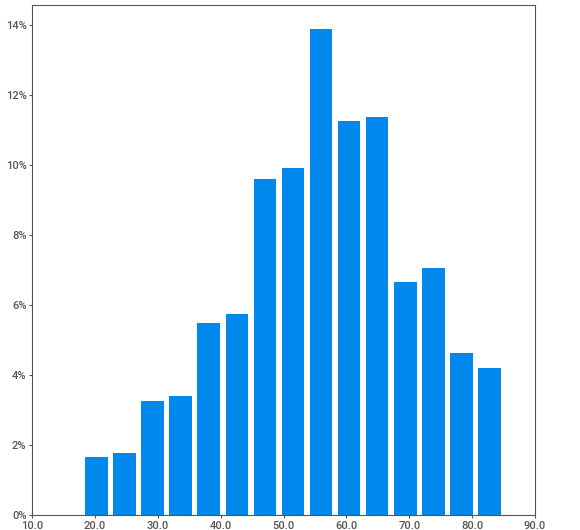
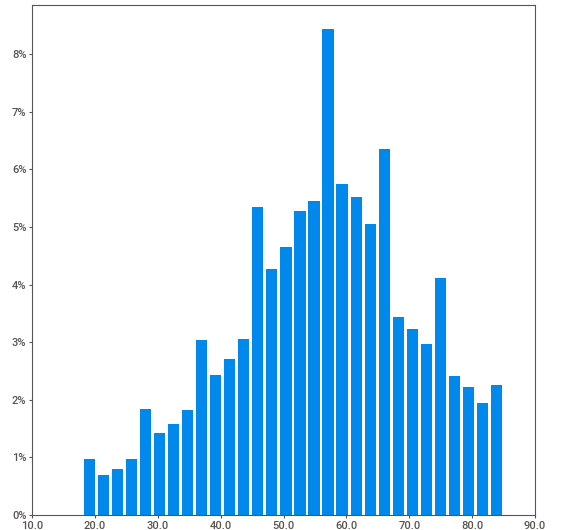
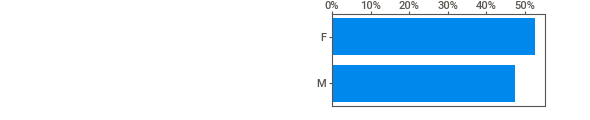
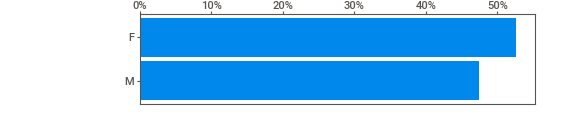
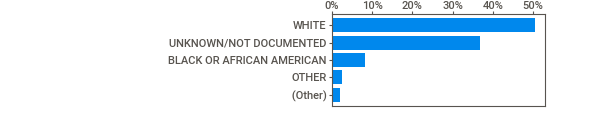
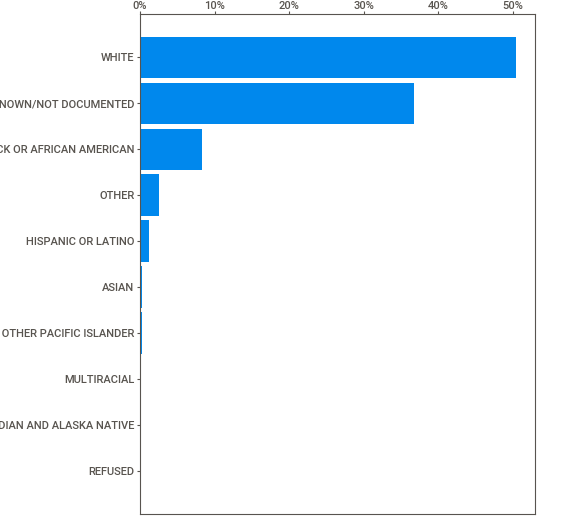
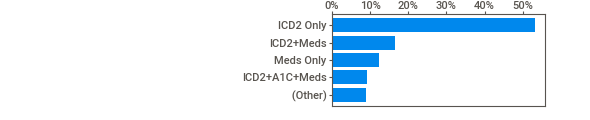
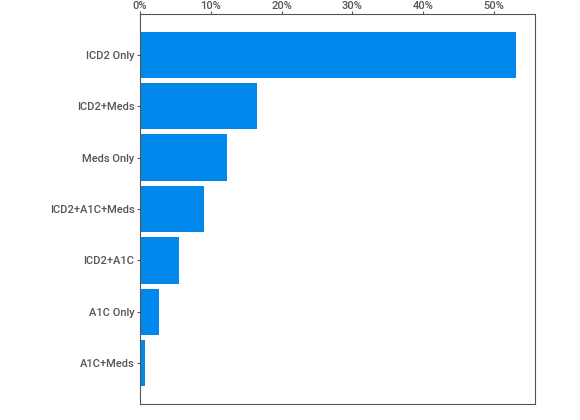
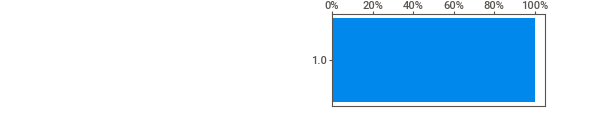
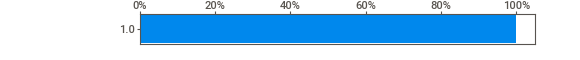
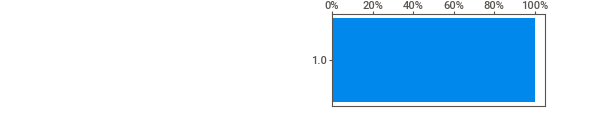
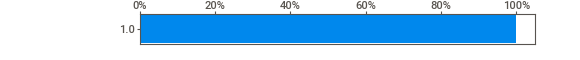
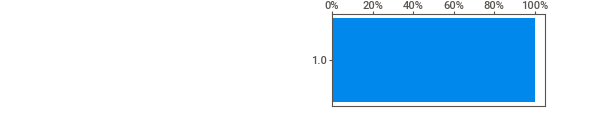
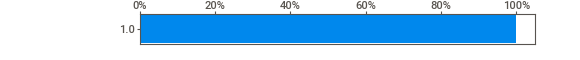
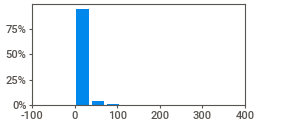
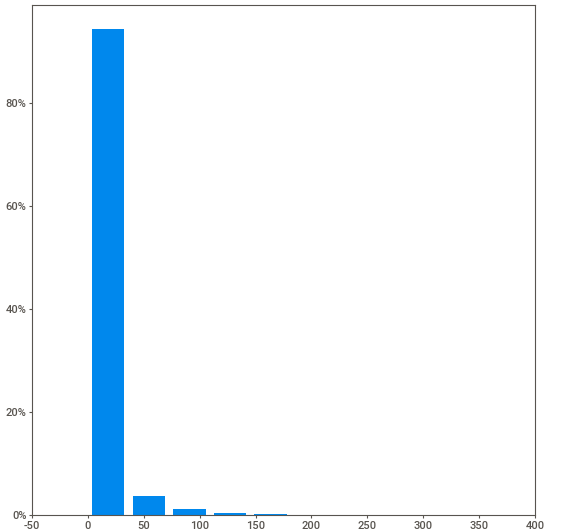
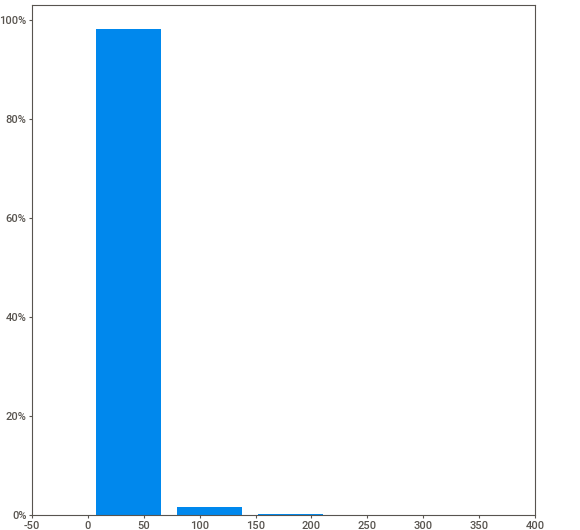
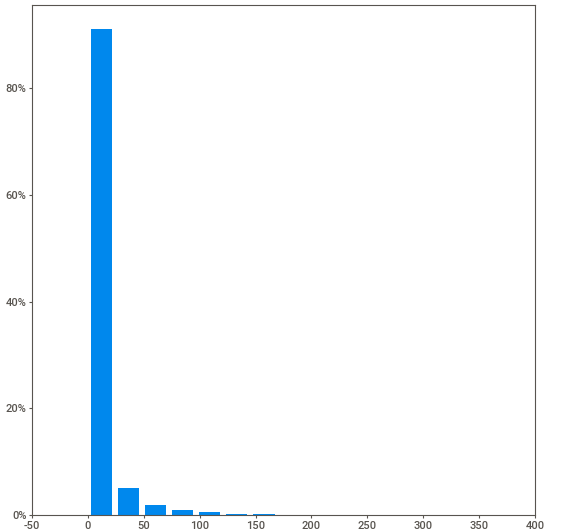
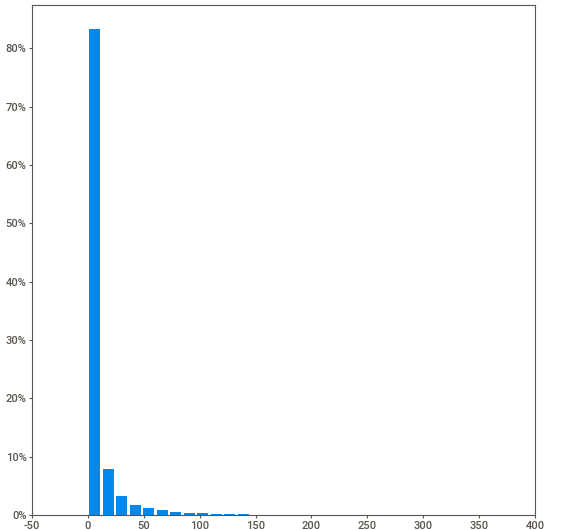
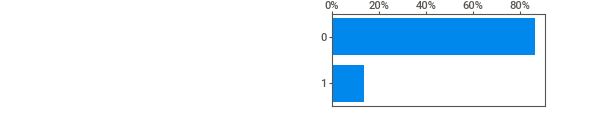
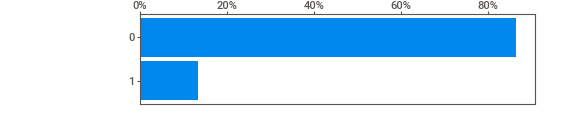
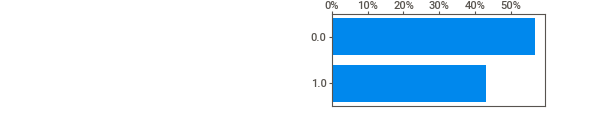
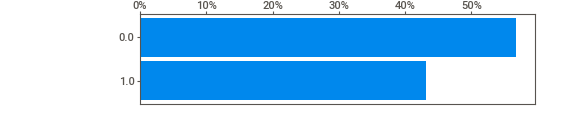
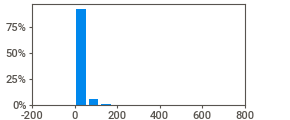
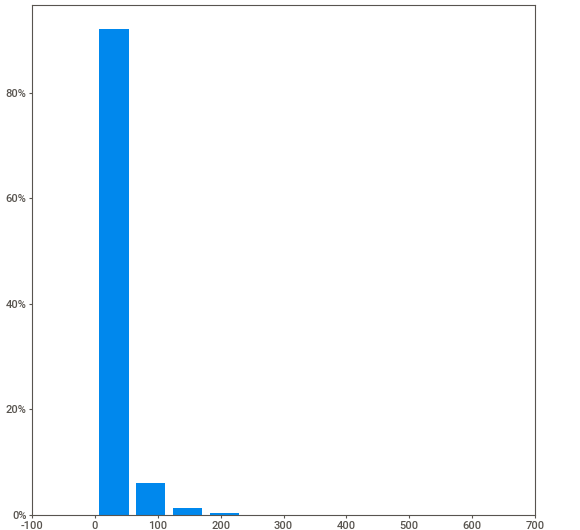
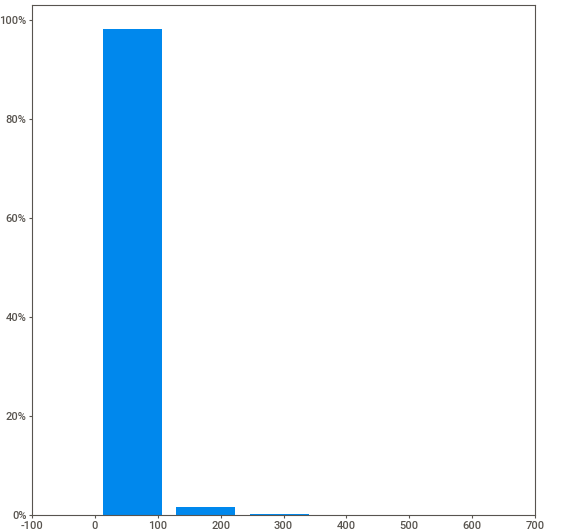
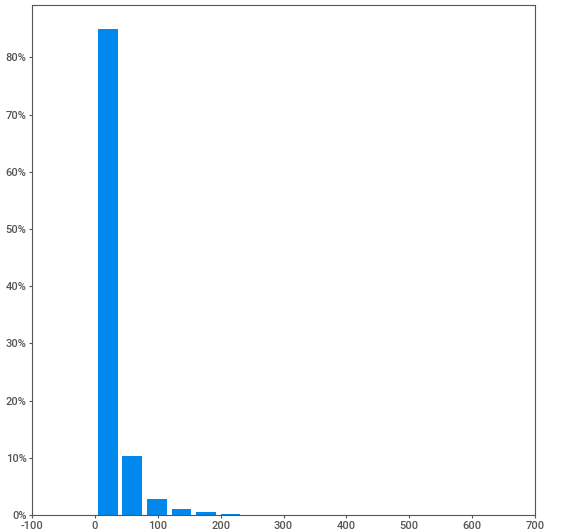
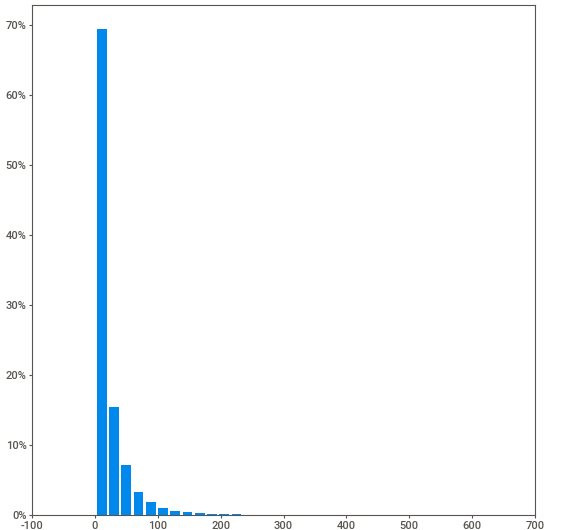
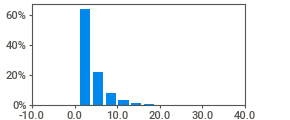
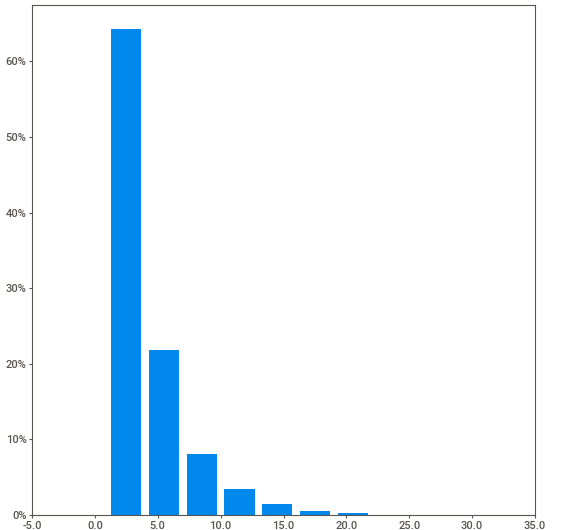
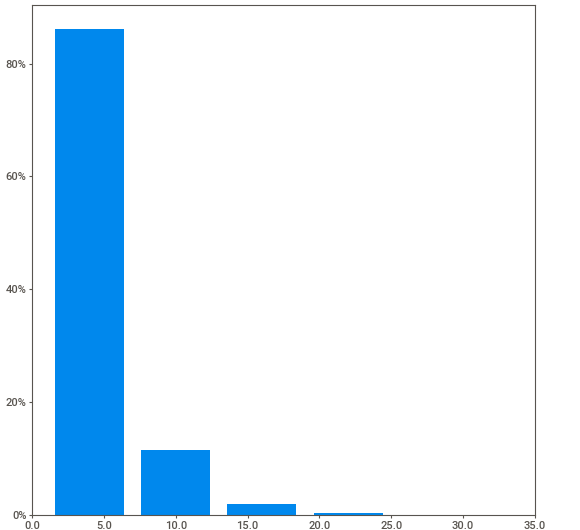
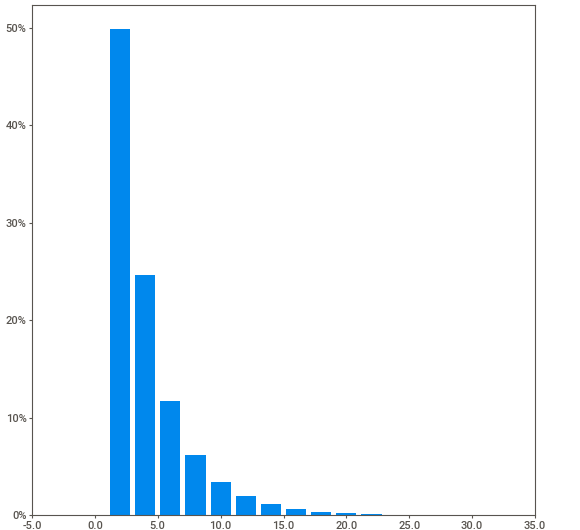
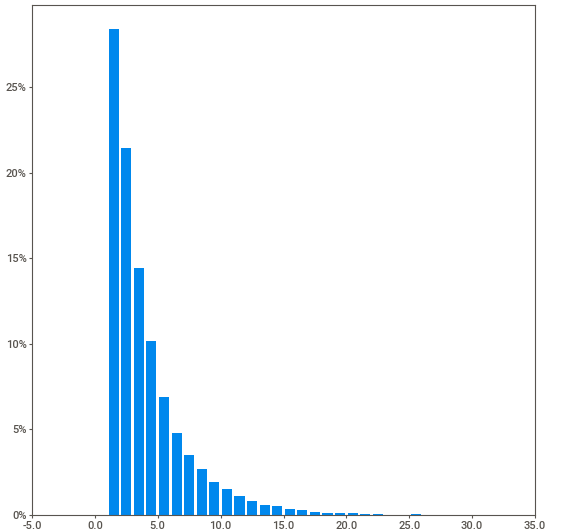
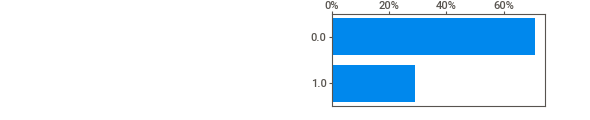
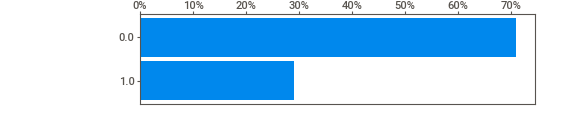
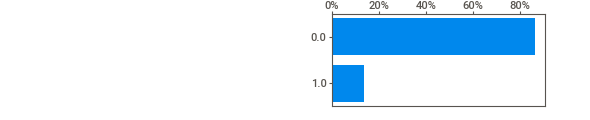
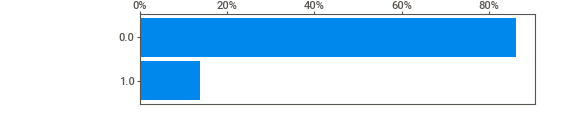
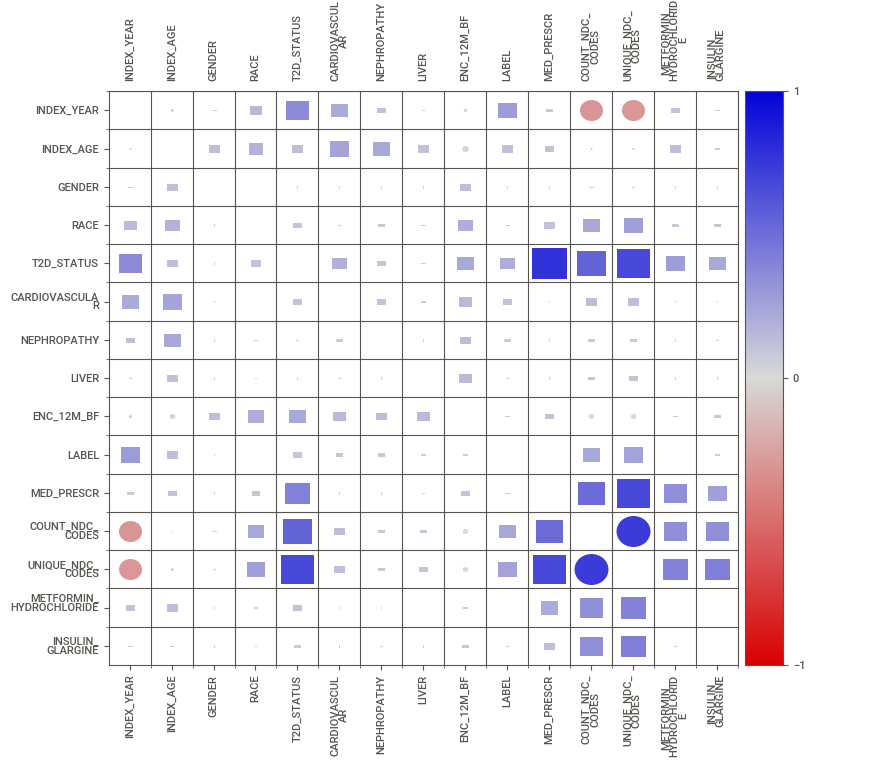
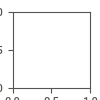

In [10]:
cohort_analysis = sv.analyze(cohort)  
cohort_analysis.show_notebook()

<h2>Comparing  subsets of Inpatients and Outpatients side-by-side</h2>

Another way to get insights from the data is to use the comparison functionality to split final cohort into 2 sub-populations.

                                             |                                             | [  0%]   00:00 ->…


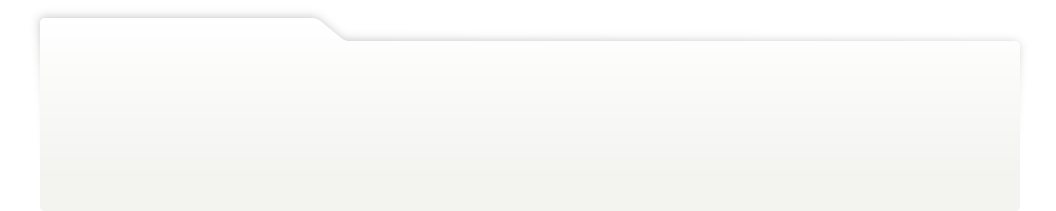
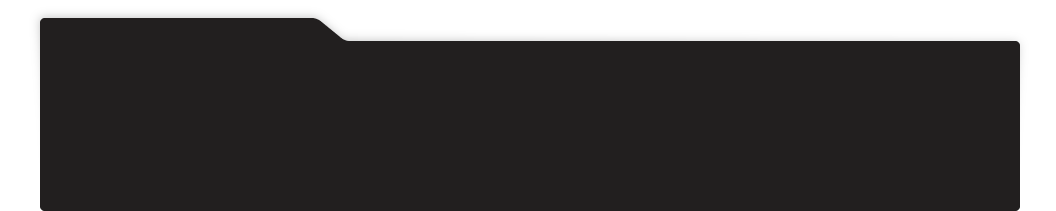
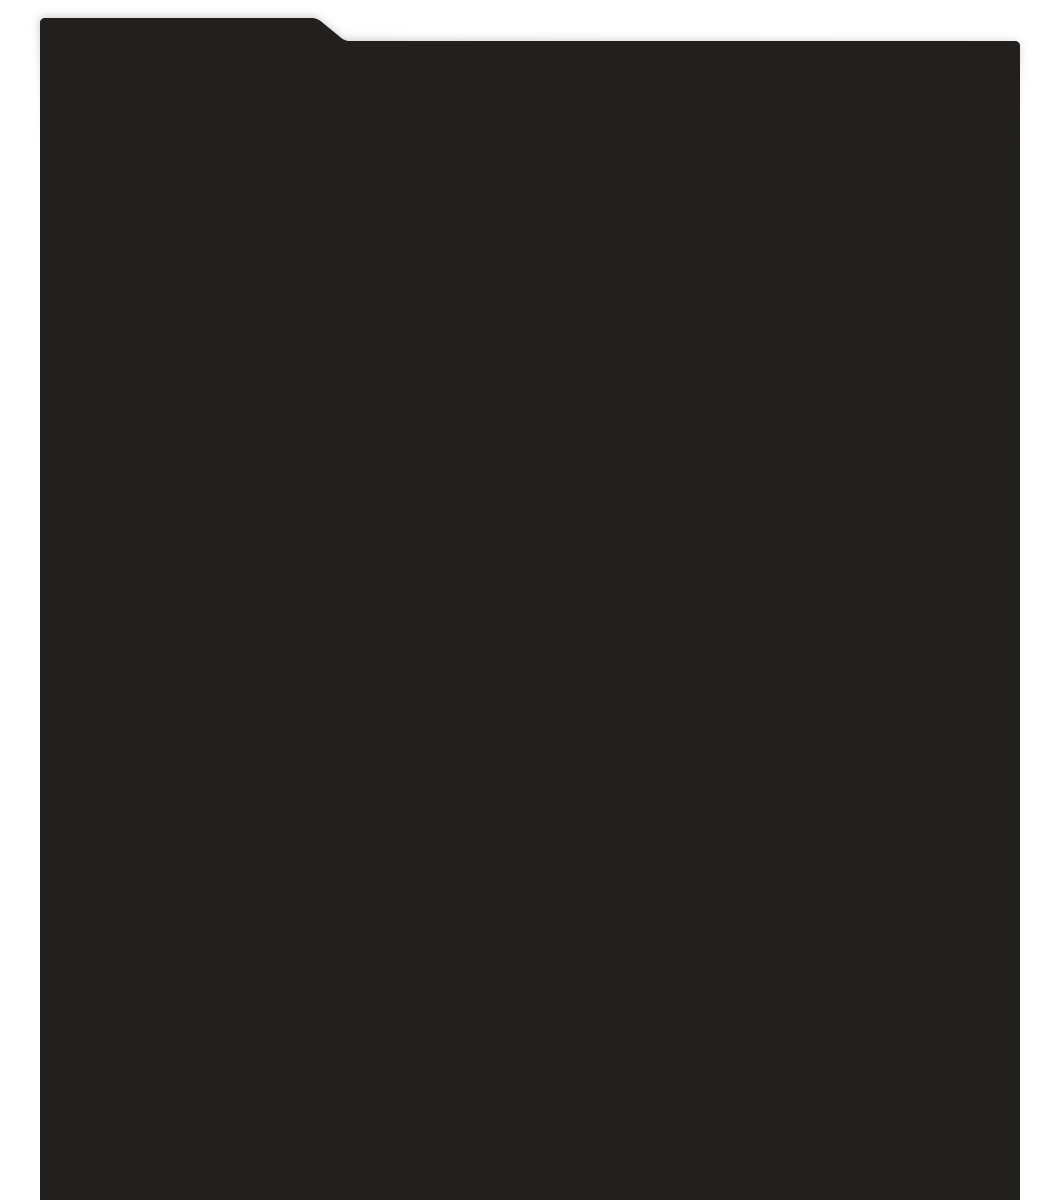
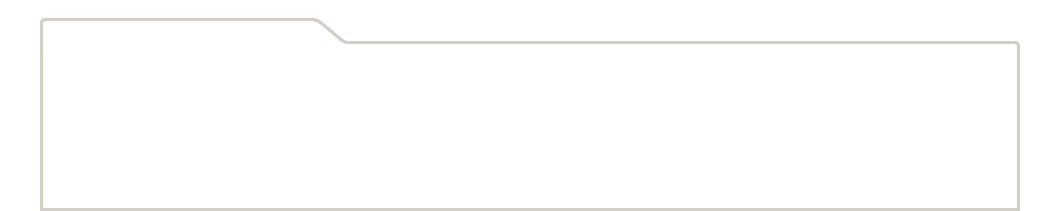
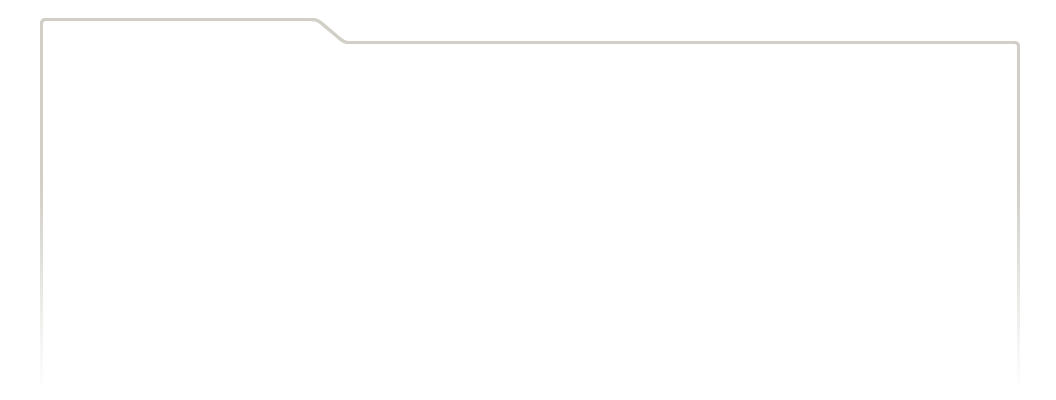
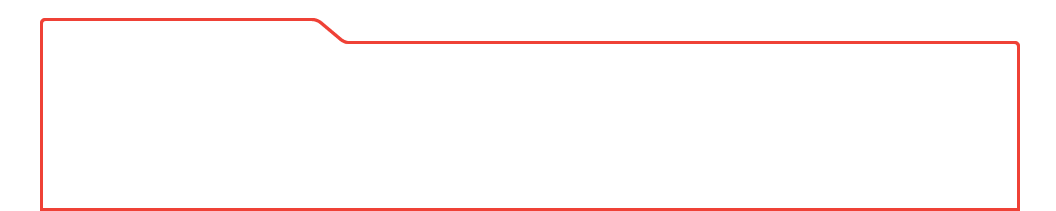
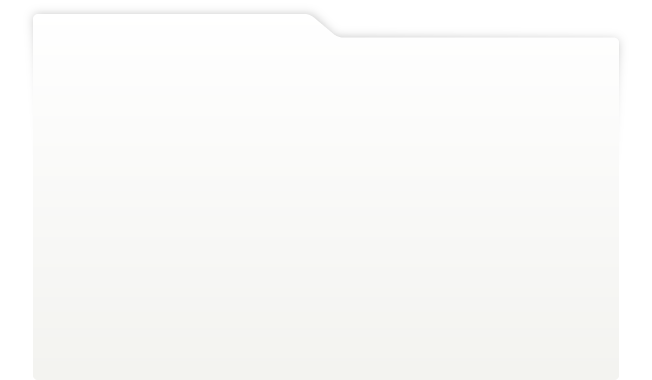
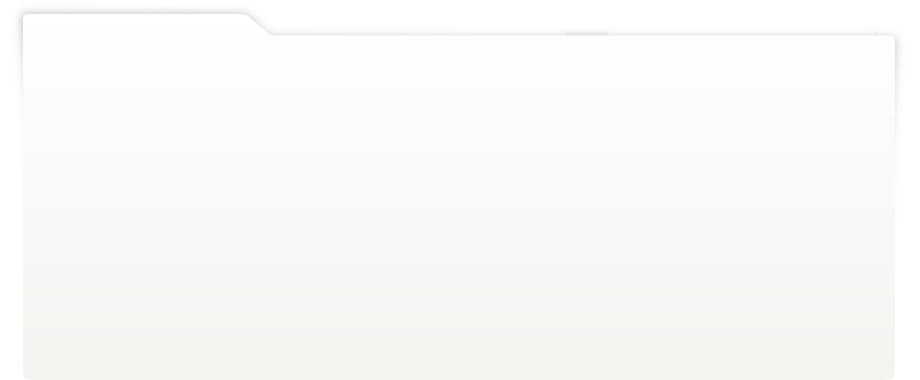
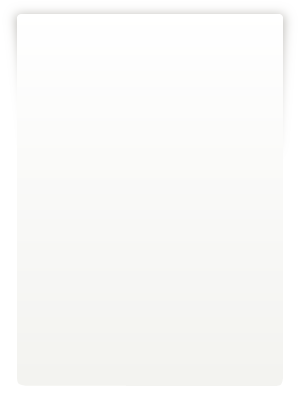
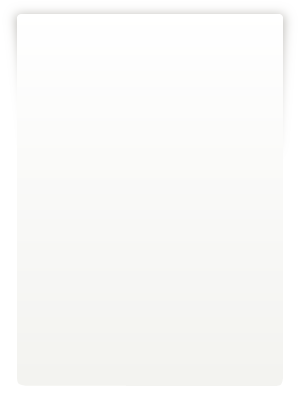
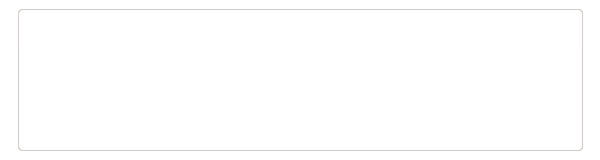
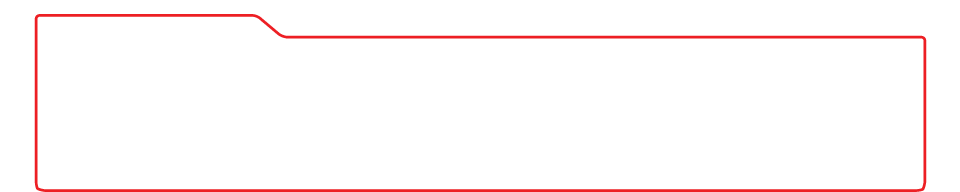
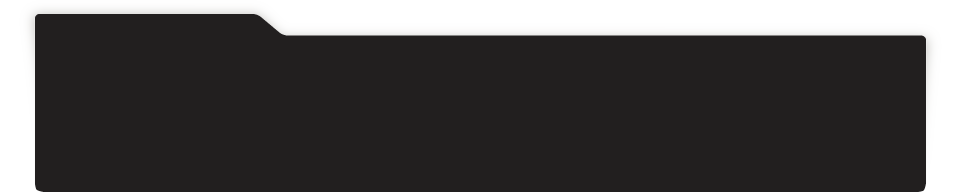
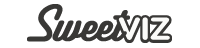
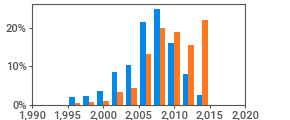
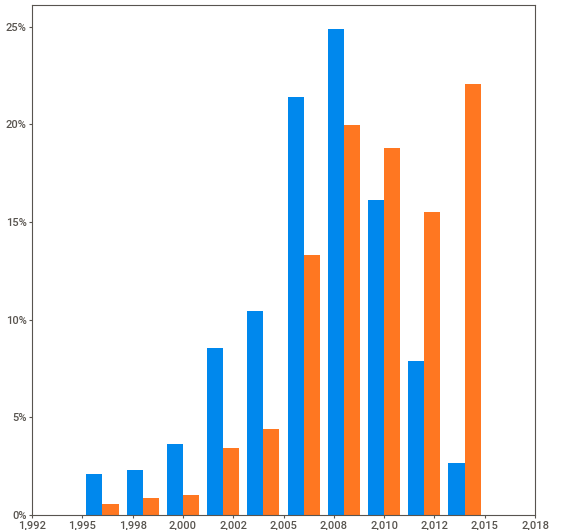
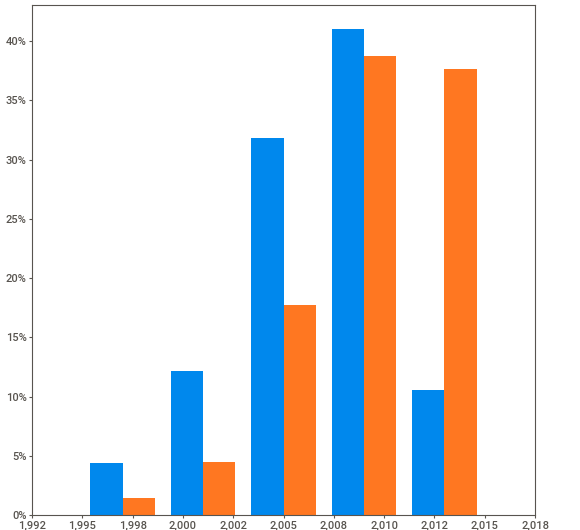
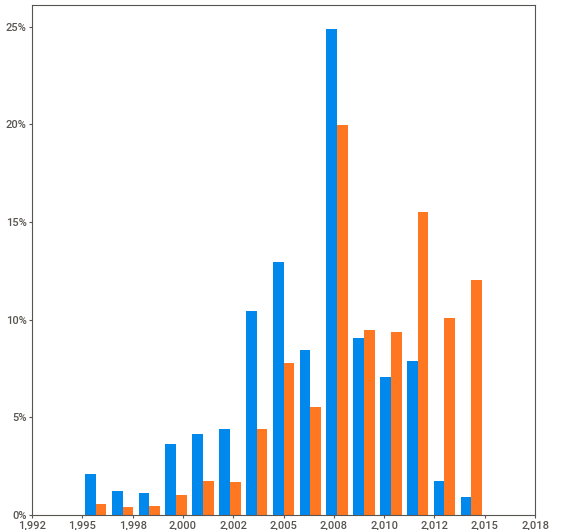
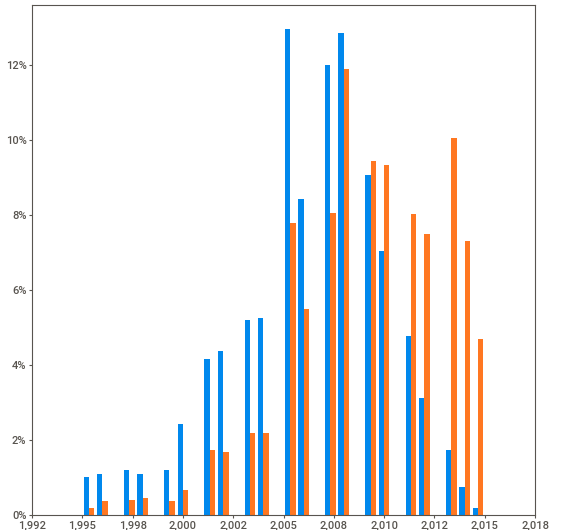
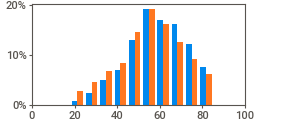
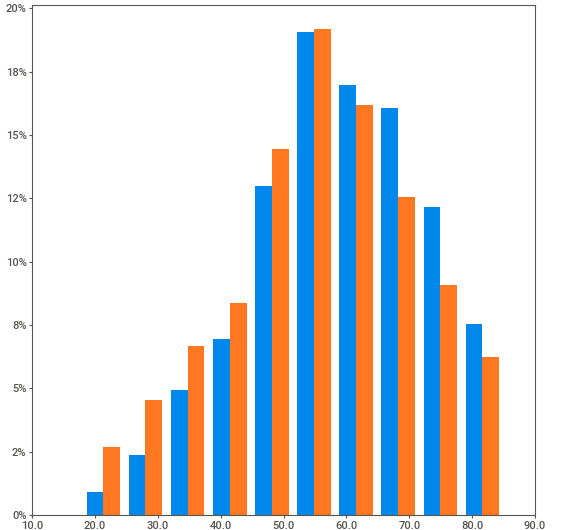
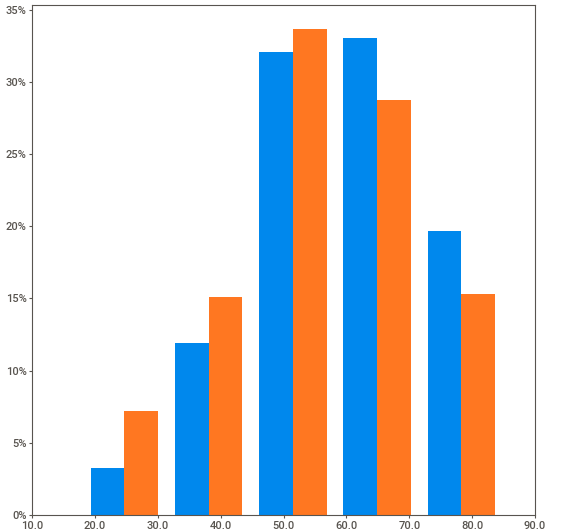
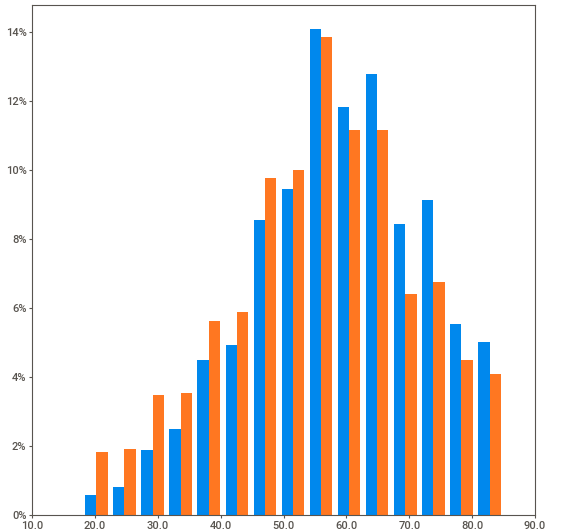
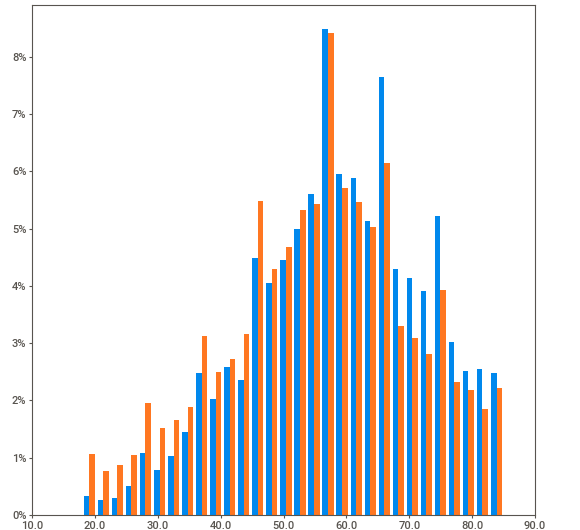
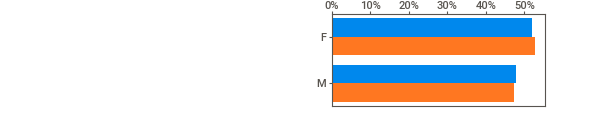
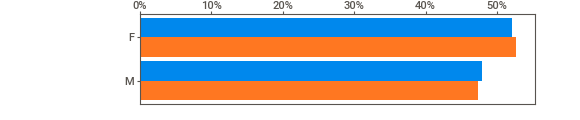
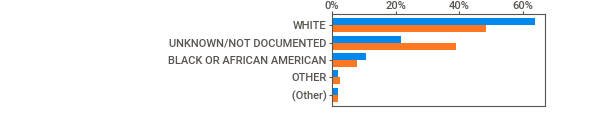
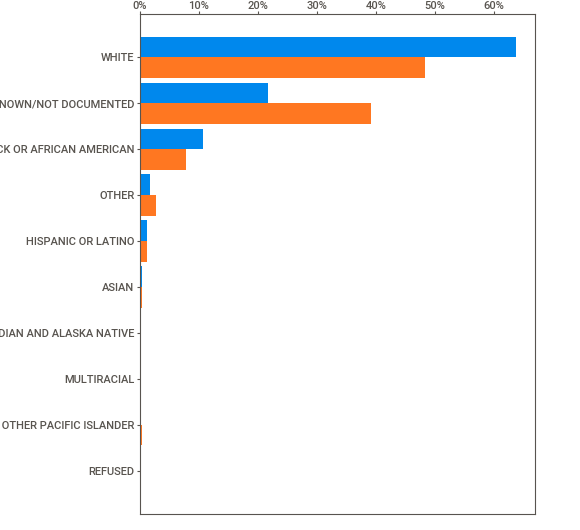
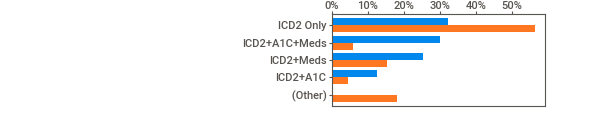
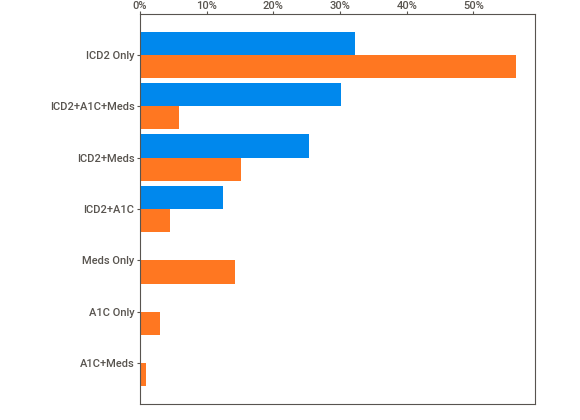
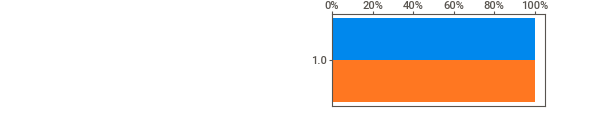
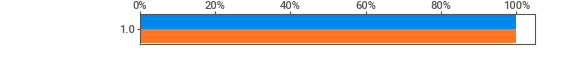
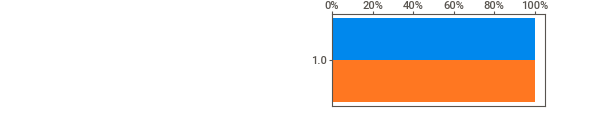
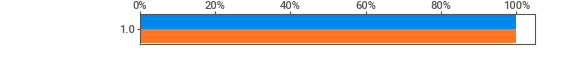
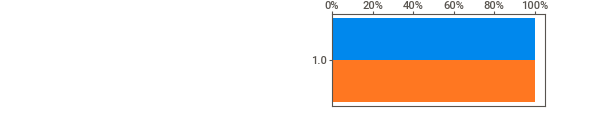
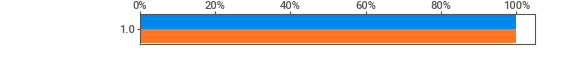
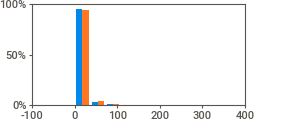
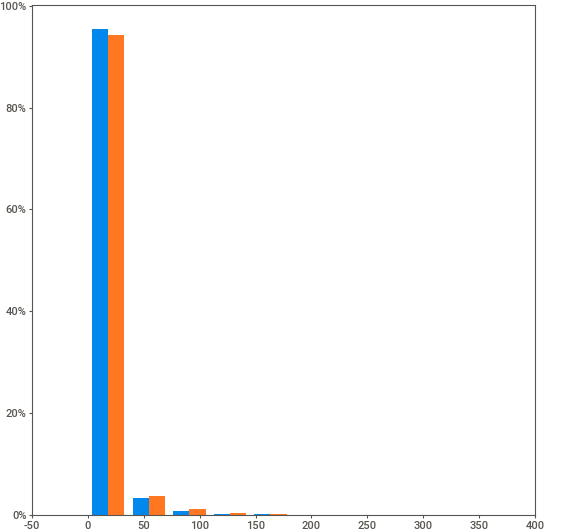
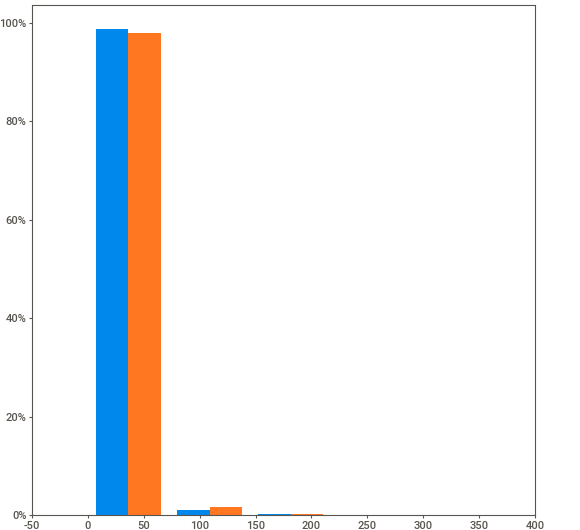
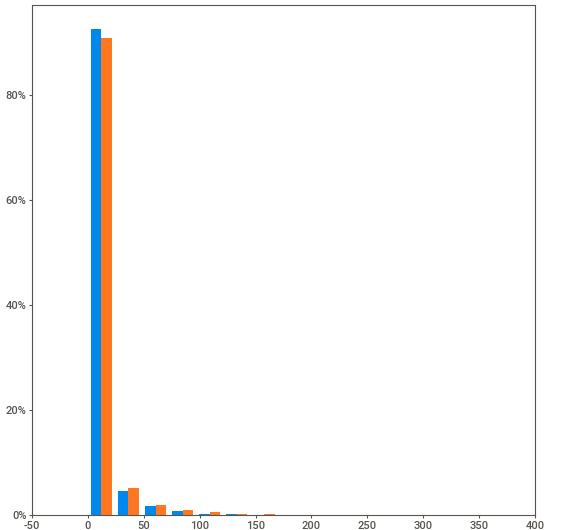
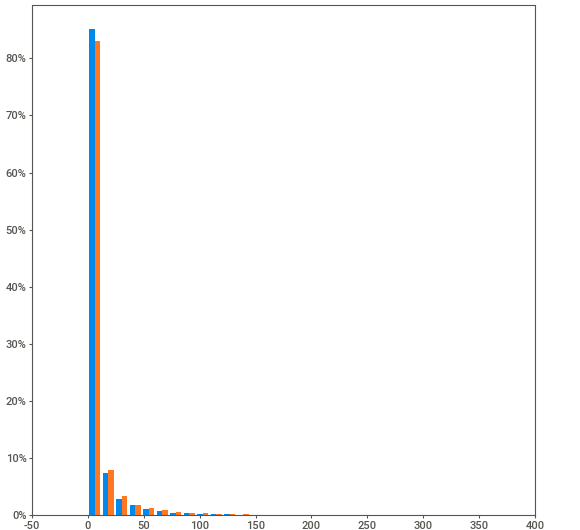
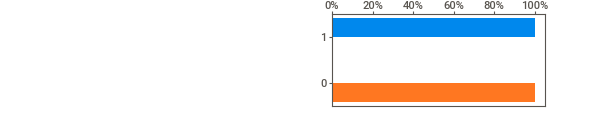
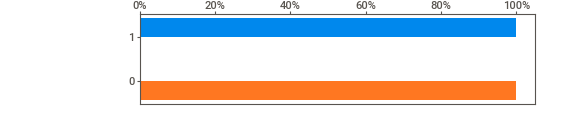
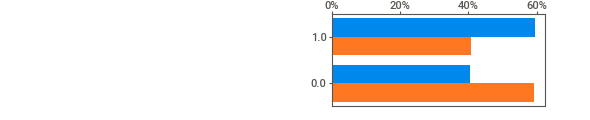
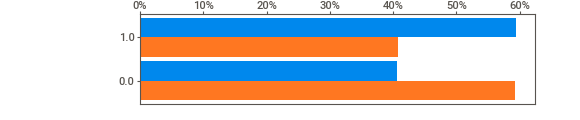
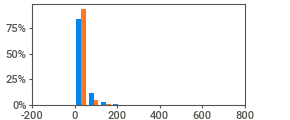
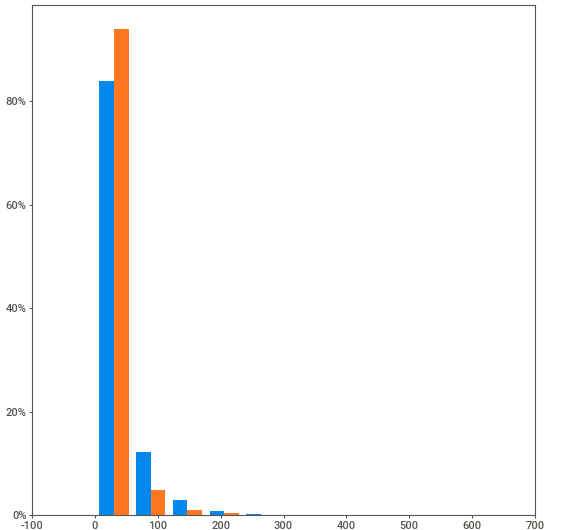
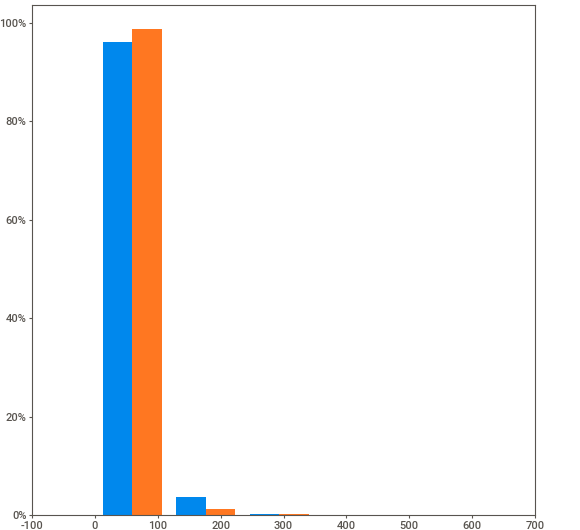
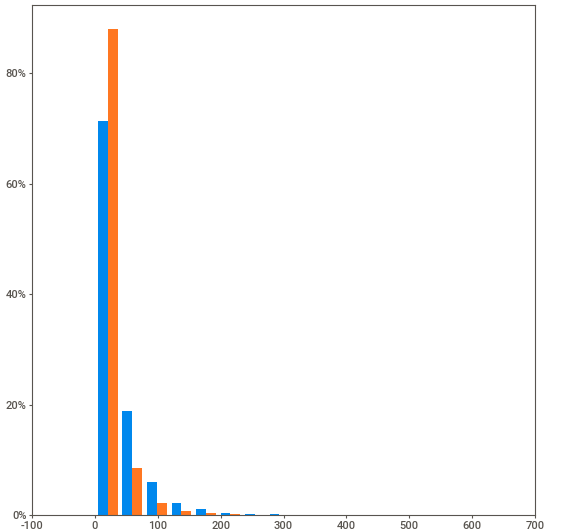
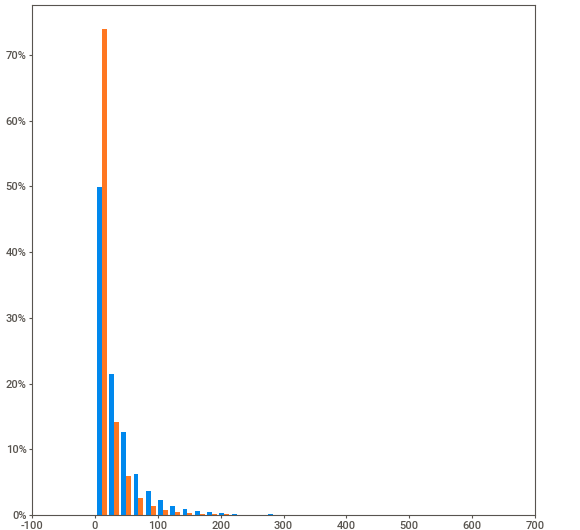
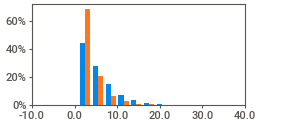
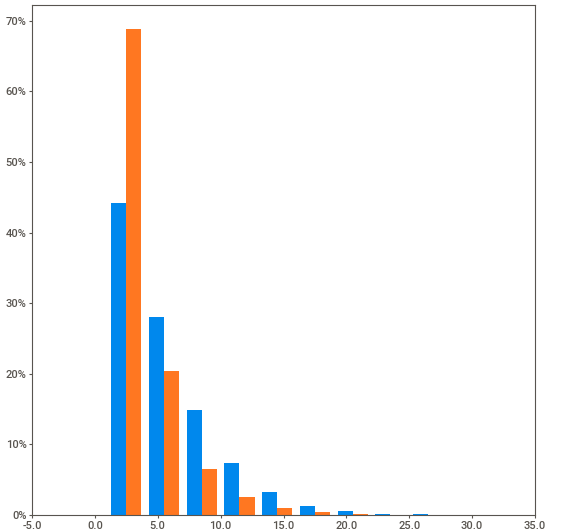
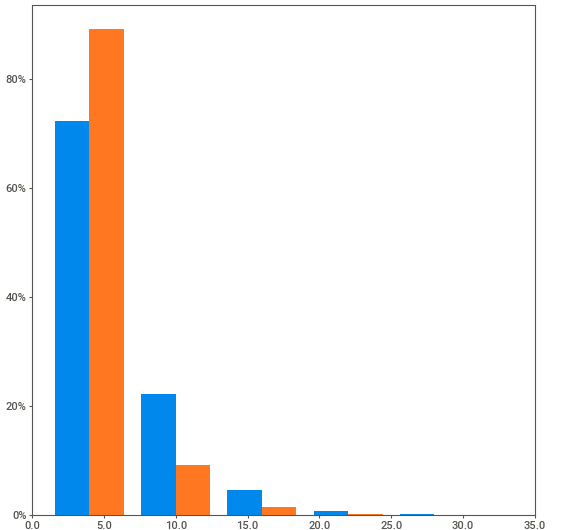
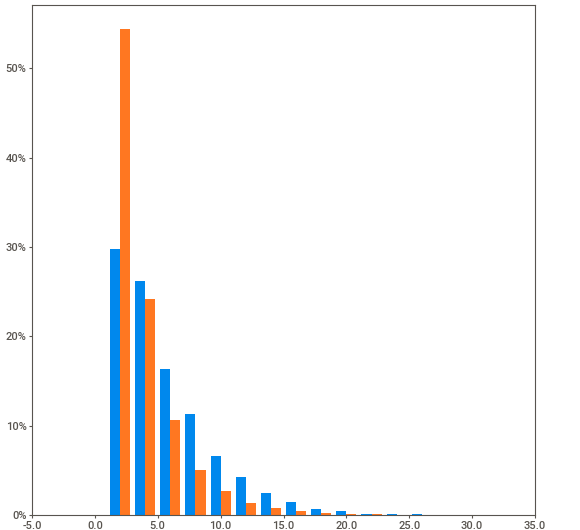
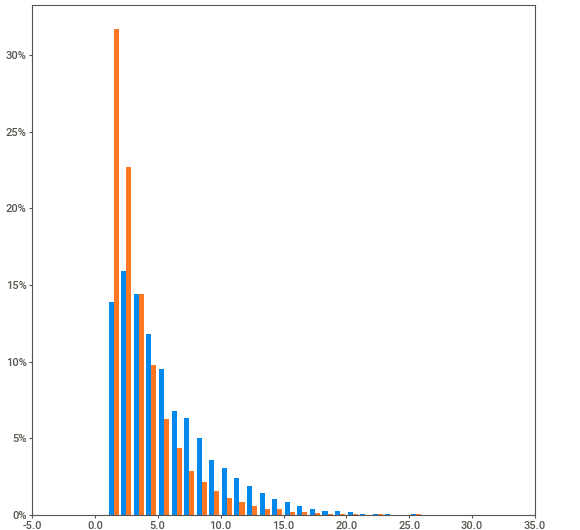
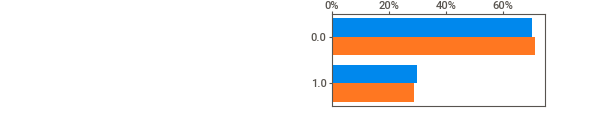
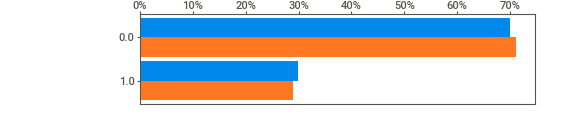
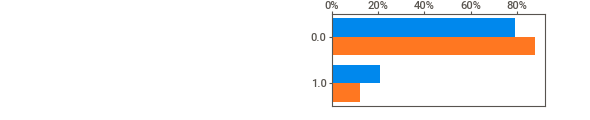
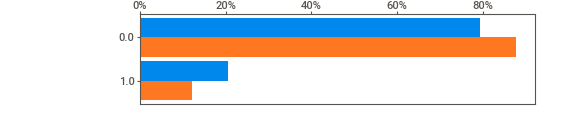
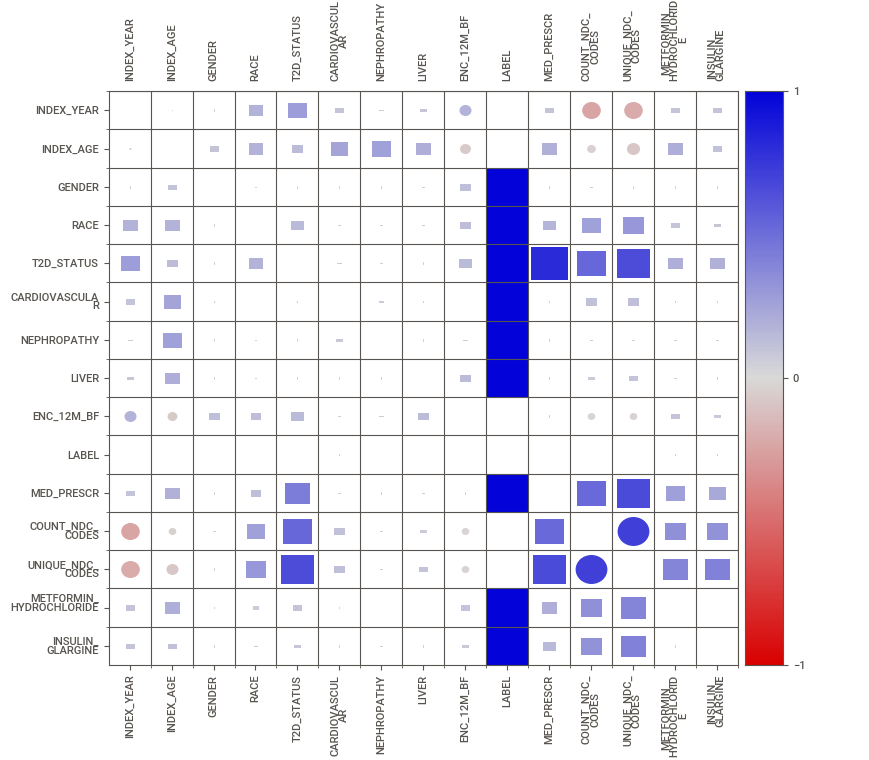
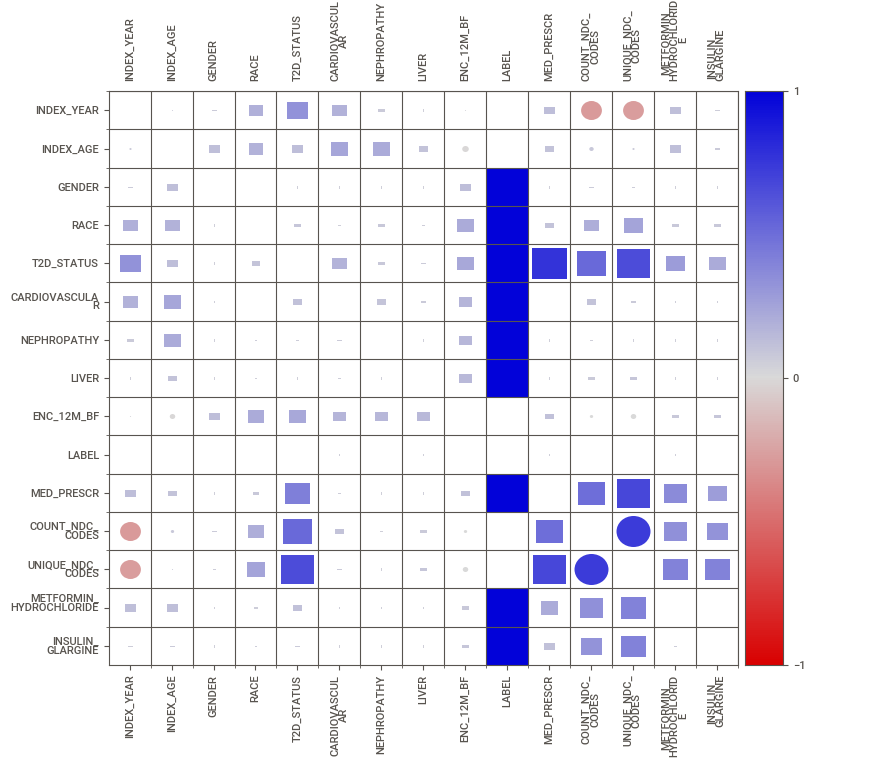

In [11]:
#Another way to get great insights is to use the comparison functionality to split your dataset into 2 sub-populations.
my_report = sv.compare_intra(cohort, cohort["LABEL"] == 1, ["Inpatients due to diabetes", "Outpatients"])
my_report.show_notebook()

# Data Wrangling

<div>Data Wrangling is the process of converting data from the initial format to a better for analysis format.</div> 

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


Steps for working with missing data:

<ol>
    <li>dentify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>


In [12]:
pd.set_option('display.max_rows', 50)
# Number of missing values
cohort.isnull().sum().sort_values(ascending=False)

LIVER                      74178
NEPHROPATHY                70455
COUNT_NDC_CODES            44231
UNIQUE_NDC_CODES           44231
METFORMIN_HYDROCHLORIDE    44231
INSULIN_GLARGINE           44231
CARDIOVASCULAR             26340
INDEX_YEAR                     0
INDEX_AGE                      0
GENDER                         0
RACE                           0
T2D_STATUS                     0
ENC_12M_BF                     0
LABEL                          0
MED_PRESCR                     0
dtype: int64

In [13]:
#Require that many non-NA values.
label = Label('Threshold for missing values:')
w = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, )
HBox([label, w])

In [14]:
print(w.value)
print('Before deletion of missing values' + str(cohort.shape))
thresh = len(cohort) * w.value
cohort.dropna(axis=1, thresh=thresh, inplace=True)
print('After deletion of missing values' + str(cohort.shape))

0.5
Before deletion of missing values(77908, 15)
After deletion of missing values(77908, 9)


<h2 id="Data transformation">Data transformation</h2>

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,make_scorer,balanced_accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance



In [16]:
if 'LABEL' in cohort.columns: 
    y = cohort['LABEL']
    cohort.drop(columns=['LABEL'], inplace=True)
X=cohort

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
def cohort_2_transform_ds(X):
    values_num = X.dtypes != object
    values_cat = X.dtypes == object

    si_0 = SimpleImputer(missing_values=np.NaN,strategy='median') # mean
    ss = StandardScaler() #gives negative value
    ohe = OneHotEncoder()
    # define column groups with same processing
    cat_vars = values_cat
    #['gender','numbedscategory','ethnicity','hospitaladmitsource','hospitaldischargelocation','unittype','unitadmitsource','unitdischargelocation','region','physicianspeciality','physicianinterventioncategory','apachedxgroup']    
    num_vars = values_num
    # set up pipelines for each column group
    categorical_pipe = Pipeline([('ohe', ohe)])
    #numeric_pipe = Pipeline([('si_0', si_0)])
    numeric_pipe = Pipeline([('si_0', si_0), ('ss', ss)])#gives negative value
    # set up columnTransformer
    col_transformer = ColumnTransformer(
                        transformers=[
                            ('nums', numeric_pipe, num_vars),
                            ('cats', categorical_pipe, cat_vars)
                        ],
                        remainder='drop',
                        n_jobs=-1
                        )


    X_np = col_transformer.fit_transform(X)

    # getting names for transform data
    # categorical values
    pipe_cats_actual = col_transformer.named_transformers_['cats']
    names_cats = pipe_cats_actual['ohe'].get_feature_names()
    print('Number of categorical names: %d ' %  len(names_cats))
    # numerical values
    names = [name for name, value in num_vars.iteritems() if value]
    names_num = names
    print('Number of numerical names: %d ' %  len(names_num))
    # lasst of all new names
    names_all = list(names_num) + list(names_cats)

    X_df= pd.DataFrame(X_np,columns= names_all)
    return X_np, X_df



In [19]:
X_train_np, X_train_df=cohort_2_transform_ds(X_train)

Number of categorical names: 19 
Number of numerical names: 5 


In [20]:
X_test_np, X_test_df=cohort_2_transform_ds(X_test)

Number of categorical names: 19 
Number of numerical names: 5 


# Model Development

In [21]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [22]:
def create_model(x, dataset_type):
    mcc=0
    roc_auc=0
    bacc=0
    target_names = [ 'Outpatient','Inpatient']
    if x=='LR':
        model = LogisticRegression(random_state=0, max_iter=300)
        
    elif x=='NB':
        model = BernoulliNB() # GaussianNB()
        
    elif x=='DT':
        model = DecisionTreeClassifier(random_state=0)

    model.fit(X_train_np, y_train)
    
    if dataset_type == 'Test':
        y_pred=model.predict(X_test_np)
        mcc=matthews_corrcoef(y_test, y_pred)
        bacc=balanced_accuracy_score(y_test, y_pred)
        if  x in ('LR','DT', 'NB'):
            roc_auc=roc_auc_score(y_test, model.predict_proba(X_test_np)[:, 1])
        cm = confusion_matrix(y_test, y_pred)


        print('Blind dataset - 30%')
        print('-------------------------')
        print("MCC {}".format(round(mcc,2)))
        print("ROC AUC {}".format(round(roc_auc,2)))
        print("Balanced accuracy {}".format(round(bacc,2)))
        print(cm)
        print(classification_report(y_test, y_pred, target_names=target_names))

        # plot feature importance    
        if x == 'LR':
            importance = model.coef_[0]
            plt.bar([x for x in range(len(importance))], importance)
            plt.show()
        elif x=='NB':  
            imps = permutation_importance(model, X_test_np, y_test)
            importances = imps.importances_mean
            std = imps.importances_std
            indices = np.argsort(importances)[::-1]
            # Print the feature ranking
            print("Feature ranking:")
            for f in range(X_test_df.shape[1]):
                print("%d. %s (%f)" % (f + 1, X_test_df.columns[f], importances[indices[f]]))
  

        else:
            plot_feature_importance(model.feature_importances_, X_test_df.columns[0:], x)
            plt.show()
    elif dataset_type == 'Train':
        Matthew = make_scorer(matthews_corrcoef)
        cv_mcc_mean = np.mean(cross_val_score(model, X_train_np, y_train ,cv=10,scoring=Matthew))
        cv_roc_auc_mean = np.mean(cross_val_score(model, X_train_np, y_train , cv=10, scoring='roc_auc'))
        cv_baccuracu_mean = np.mean(cross_val_score(model, X_train_np, y_train , cv=10, scoring='balanced_accuracy'))

        print('Train dataset - 67%')
        print('------------------------')
        print("MCC {}".format(round(cv_mcc_mean,2)))
        print("ROC AUC {}".format(round(cv_roc_auc_mean,2)))
        print("Balanced accuracy {}".format(round(cv_baccuracu_mean,2)))
    
  

# Model Evaluation

LR
Blind dataset - 30%
-------------------------
MCC 0.26
ROC AUC 0.81
Balanced accuracy 0.57
[[19920   346]
 [ 2616   491]]
              precision    recall  f1-score   support

  Outpatient       0.88      0.98      0.93     20266
   Inpatient       0.59      0.16      0.25      3107

    accuracy                           0.87     23373
   macro avg       0.74      0.57      0.59     23373
weighted avg       0.84      0.87      0.84     23373



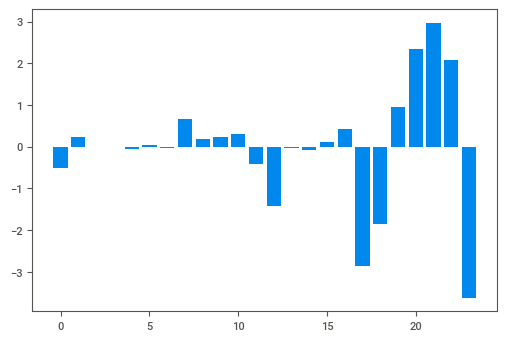

***********************
NB
Blind dataset - 30%
-------------------------
MCC 0.35
ROC AUC 0.8
Balanced accuracy 0.68
[[18339  1927]
 [ 1702  1405]]
              precision    recall  f1-score   support

  Outpatient       0.92      0.90      0.91     20266
   Inpatient       0.42      0.45      0.44      3107

    accuracy                           0.84     23373
   macro avg       0.67      0.68      0.67     23373
weighted avg       0.85      0.84      0.85     23373

Feature ranking:
1. INDEX_YEAR (0.014102)
2. INDEX_AGE (0.004261)
3. CARDIOVASCULAR (0.001284)
4. ENC_12M_BF (0.000633)
5. MED_PRESCR (0.000068)
6. x0_F (0.000026)
7. x0_M (0.000000)
8. x1_AMERICAN INDIAN AND ALASKA NATIVE (0.000000)
9. x1_ASIAN (-0.000009)
10. x1_BLACK OR AFRICAN AMERICAN (-0.000068)
11. x1_HISPANIC OR LATINO (-0.000068)
12. x1_MULTIRACIAL (-0.000240)
13. x1_NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER (-0.000368)
14. x1_OTHER (-0.000368)
15. x1_REFUSED (-0.000385)
16. x1_UNKNOWN/NOT DOCUMENTED (-0.00075

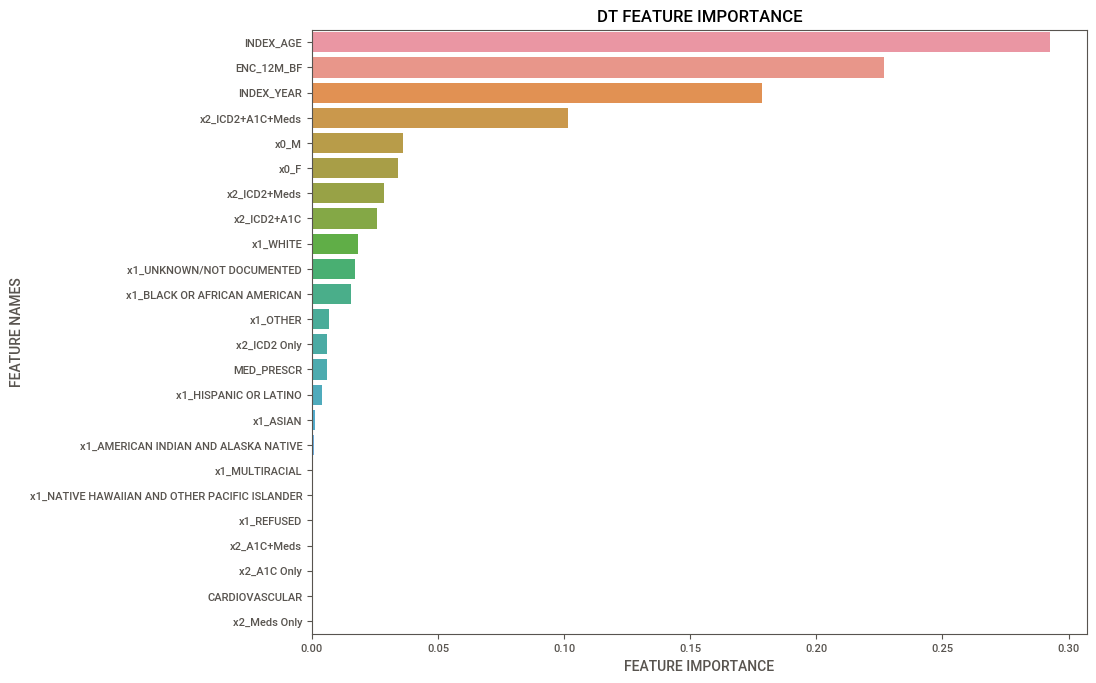

***********************


In [23]:
models = ['LR','NB','DT']
for m in models:
    print(m)
    create_model(m, 'Test')
    print('***********************')

In [24]:
models = ['LR','NB','DT']
for m in models:
    print(m)
    create_model(m, 'Train')
    print('***********************')

LR
Train dataset - 67%
------------------------
MCC 0.26
ROC AUC 0.81
Balanced accuracy 0.57
***********************
NB
Train dataset - 67%
------------------------
MCC 0.35
ROC AUC 0.79
Balanced accuracy 0.68
***********************
DT
Train dataset - 67%
------------------------
MCC 0.21
ROC AUC 0.62
Balanced accuracy 0.6
***********************


# Data Analysis 